In [2]:
import numpy as np
import imageio as io
from matplotlib import pyplot as plt
import cv2
import os
from glob import glob

OUTPUT_CAR_IMG_DIR = './gray_cropped_images/cars/'
OUTPUT_NON_CAR_DIR = './gray_cropped_images/non-cars/'
ORIGINAL_IMG_DIR = '/home/jc/Desktop/SYSU_Nighttime/gray_images'

# Overall point of this program
#
# Intake all of the images into a numpy array
# Intake all of the label data for the bounding boxes to a numpy array 
#
# Iterate through all of the images, crop images of vehicles from them, and save these 
# cropped subimages into a new directory 
#

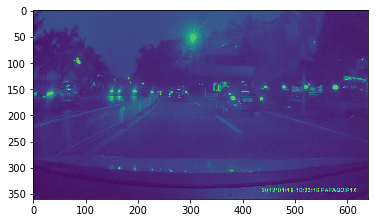

In [3]:
# Here we are going to sort our list of images by their file names
# so that we have them in their ACTUAL order. Then we will pull the images out of their 
# dictionaries so that we can really see what is going on
import re
import operator

img_paths = os.path.join(ORIGINAL_IMG_DIR, '*.jpg')
img_files = glob(img_paths)

num_imgs = len(img_files)

imgs = []

for i, f in enumerate(img_files):
     img = io.imread(f)
     imgs.append({'data': img, 'f': f})

for img in imgs:
    img['i'] = int(re.findall(r'\d+', img.get('f'))[0])

imgs.sort(key=operator.itemgetter('i'))

imgs = [img['data'] for img in imgs]

plt.imshow(imgs[0])
plt.show()

(array([2466.,    0., 2913.,    0.,    0.,    0.,    0.,    0.,    0.,
         197.]),
 array([640., 672., 704., 736., 768., 800., 832., 864., 896., 928., 960.]),
 <a list of 10 Patch objects>)

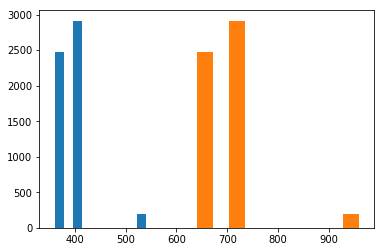

In [5]:
# Here, I'm just looking at the heights and widths of all of the images in the dataset
# to geta general idea of their dimensions
heights = []
widths = []

for img in imgs:
    widths.append(img.shape[0])
    heights.append(img.shape[1])

plt.hist(widths)    
plt.hist(heights)
    

In [16]:
box_file_name = 'GT5576.txt'

img_boxes = []

# Read in file and get the the content 
with open(box_file_name) as file:
     content = file.readlines()

content = [str.strip() for str in content] 


# This is a single example, which will be in a loop 
for line in content:
    single_img_content = [int(num) for num in line.split()] 
    meta = single_img_content[0:2]
    coordinates = single_img_content[2:]  
        
    img_dict = {
       'id': int(meta[0]),
        'num_boxes': int(meta[1]),
        'boxes': []
    }    
    
    for i in range(img_dict.get('num_boxes')):
        car_dat = coordinates[i*4:i*4+4]
        car_dict = {
            'x': car_dat[0],
            'y': car_dat[1],
            'width': car_dat[2],
            'height': car_dat[3]
        }
        img_dict.get('boxes').append(car_dict)

    img_boxes.append(img_dict)
    
# We now have the data with the location ofthe bounding boxes for each image stored in the 
# following format
# {'num_boxes': 6,
#  'id': 1,
#  'boxes': [{'width': 108, 'x': 347, 'y': 142, 'height': 64} ... ] }

width: 640
height: 360


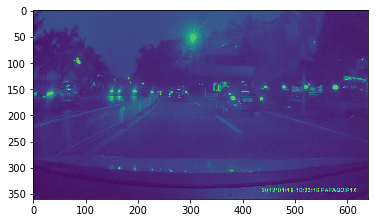

In [17]:
# Because it will be useful later on down the line, we will add in the dimensions 
# of each image to the dictionary of images
for i, img in enumerate(imgs):
    img_boxes[i]['img_height'] = img.shape[0]
    img_boxes[i]['img_width'] = img.shape[1]


# !!! CAUTION: This one is easy to mess up, make sure this is correct    
# Print out the widths and heights of the first image and display the 
# image. COMPARE DISPLAYED DIMENSIONS TO DESCRIBED DIMENSIONS OF IMG. 
#
print('width: ' + str(img_boxes[0].get('img_width')))
print('height: ' + str(img_boxes[0].get('img_height')))
plt.imshow(imgs[0])
plt.show()


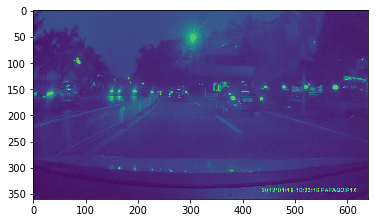

[{'x': 347, 'width': 108, 'height': 64, 'y': 142}, {'x': 252, 'width': 56, 'height': 30, 'y': 145}, {'x': 252, 'width': 56, 'height': 30, 'y': 145}, {'x': 3, 'width': 95, 'height': 54, 'y': 132}, {'x': 140, 'width': 35, 'height': 25, 'y': 142}, {'x': 185, 'width': 49, 'height': 25, 'y': 142}]


In [18]:
# Now let's get to croppin!
# Let's first try it out with an example 
# I think that currently the way that the actual images are taken in from the directory 
# is not in the same order that we see them. Computers, man
#
import matplotlib

img = imgs[0]
box_list = img_boxes[0].get('boxes')

plt.imshow(img)
plt.show()

print(img_boxes[0].get('boxes'))


car_num = 0
for i, box in enumerate(box_list):
    x = int(box.get('x'))
    y = int(box.get('y'))
    w = int(box.get('width'))
    h = int(box.get('height'))

    cv2.imwrite(OUTPUT_CAR_IMG_DIR + "img%s_car%s.jpg" %(car_num, i), img[y:(y+h), x:(x+w)])
    

In [19]:
# Dope, now we've figured out an algorithm to crop the cars out
# Let's do it for the whole data set 

for i, img in enumerate(imgs):
    box_list = img_boxes[i].get('boxes')

    # print('Img: ' + str(i))
    for j, box in enumerate(box_list):
        x = int(box.get('x'))
        y = int(box.get('y'))
        w = int(box.get('width'))
        h = int(box.get('height'))
        cv2.imwrite(OUTPUT_CAR_IMG_DIR + "img%s_car%s.jpg" %(i, j), img[y:(y+h), x:(x+w)])
        # print('   Car: ' + str(j))


In [20]:
# Here we are just going to get some basic staistics about the sizes of our vehicle images
# Here we are going to sort our list of images by their file names
# so that we have them in their ACTUAL order. Then we will pull the images out of their 
# dictionaries so that we can really see what is going on
cropped_img_paths = os.path.join(OUTPUT_CAR_IMG_DIR, '*.jpg')
cropped_img_files = glob(cropped_img_paths)

num_imgs = len(cropped_img_files)

print('There are ' + str(len(cropped_img_files)) + ' cropped vehicle images')

cropped_img_heights = [] 
cropped_img_widths = []

for f in cropped_img_files:
    img = io.imread(f)
    cropped_img_widths.append(img.shape[0])
    cropped_img_heights.append(img.shape[1])
  



There are 12752 cropped vehicle images


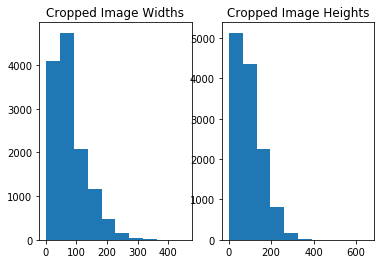

Average img widths: 78.5723808030113
img width std_dev: 53.37761006945177

Average img heights: 96.20969259723965
img height std_dev: 63.41751072669788


In [12]:
import statistics as s

plt.figure(2)

plt.subplot(1, 2, 1)
plt.title('Cropped Image Widths')
plt.hist(cropped_img_widths)    

plt.subplot(1, 2, 2)
plt.title('Cropped Image Heights')
plt.hist(cropped_img_heights)
   
plt.show()    

   
width_ave = s.mean(cropped_img_widths) 
width_stddev = s.stdev(cropped_img_widths)
print('Average img widths: ' + str(width_ave))
print('img width std_dev: ' + str(width_stddev))
print('')

height_ave = s.mean(cropped_img_heights) 
height_stddev = s.stdev(cropped_img_heights)
print('Average img heights: ' + str(height_ave))
print('img height std_dev: ' + str(height_stddev))


In [24]:
# We now have almost 13,000 images of just cars in this directory, 
# so now we have to get a much larger quantity of non-vehiculaar sub-sections of
# the image
#
# In this block I will write the functions necessry, and in the next block I will sketch out 
# I am going to use these functions
import pdb 
import random
from datetime import datetime

random.seed(datetime.now())

# This will return a list of dicts which contain image data
# and a new file Names
def extractNonCarImages(img, img_data, new_img_size=(128, 128), num_new_imgs=12, img_name='none'):
    non_car_images = [] 
   
    for i in range(num_new_imgs):
        (x, y) = findValidImageCoordinates(img, img_data, new_img_size, prohibited_regions=img_data.get('boxes'))

        non_car_image = {}
        non_car_image['data'] = img[y:y+new_img_size[0], x:x+new_img_size[1]]
        non_car_image['name'] = img_name + str(i) + '.jpg' 
        non_car_images.append(non_car_image)

    return non_car_images


# Return X, Y coordinates of top left corner of image 
def findValidImageCoordinates(img, img_data, new_img_size=(128, 128), prohibited_regions=[]):
    # !!! Possible source of error: These img bounds were selected erroneously
    #
    valid_img_bounds = {}
    valid_img_bounds['minX'] = 0 
    valid_img_bounds['minY'] = 0 
    valid_img_bounds['maxX'] = img_data.get('img_width') - new_img_size[0]
    valid_img_bounds['maxY'] = img_data.get('img_height') - new_img_size[1]
    
    valid_coordinate_found = False 
   
    # The image proposals counter exists to act as a sort of "timeout" for images in which
    # an image will not ever be found
    image_proposals = 0
    while (not valid_coordinate_found and image_proposals < 600):
        (x, y) = stochasticXYProposal(valid_img_bounds) 
        valid_coordinate_found = validImageProposal((x, y), new_img_size, prohibited_regions)
        image_proposals = image_proposals + 1

    return (x, y) 

# Intakes Dictionary containing min/maxes of all X/Y values here
# Return tuple/dict with X/Y Coordinates for tlc of image
def stochasticXYProposal(imageBounds):
    # Maybe later on use some sort of "more inteelligent" distribution to make these proposals
    # For NOW, let's do it purely stochastically, and then see how the k-means classifier works with it :)
    x = random.randint(imageBounds['minX'], imageBounds['maxX'])  
    y = random.randint(imageBounds['minY'], imageBounds['maxY'])

    return (x, y) 

# Intakes top-left-coordinates, image size, and locations of all vehicle bounding boxes in images 
# Returns true or false determining validity
#
# Works by checking if any of the corners of the prohbited regions are inside the proposed region, 
# and vice-versa
def validImageProposal(tlc, img_size=(128, 128), prohibited_regions=[]):
    proposed_tlc = tlc
    proposed_trc = (tlc[0] + img_size[0], tlc[1])
    proposed_brc = (tlc[0] + img_size[0], tlc[1] + img_size[1])
    proposed_blc = (tlc[0]              , tlc[1] + img_size[1])
    proposed_corners = (proposed_tlc, proposed_trc, proposed_brc, proposed_blc) 

    for pr in prohibited_regions:
        for c in proposed_corners:
            if pointWithinRegion(c, pr):
                return False
   
    proposed_reg = {}
    proposed_reg['x'] = tlc[0]
    proposed_reg['y'] = tlc[1]
    proposed_reg['width'] = img_size[0]
    proposed_reg['height'] = img_size[1]
    
    for pr in prohibited_regions:
        pr_tlc = (pr.get('x')                  , pr.get('y')) 
        pr_trc = (pr.get('x') + pr.get('width'), pr.get('y'))
        pr_brc = (pr.get('x') + pr.get('width'), pr.get('y') + pr.get('height'))
        pr_blc = (pr.get('x')                  , pr.get('y') + pr.get('height'))
        pr_corners = (pr_tlc, pr_trc, pr_brc, pr_blc) 
        for pr_c in pr_corners:
            if pointWithinRegion(pr_c, proposed_reg):
                return False

    return True

# Intakes XY point tuple & prohibited regions (in form of box description from above)
# Outputs true if point is within the region, false otherwise
def pointWithinRegion(point, region):
    reg_min_x = region.get('x') 
    reg_max_x = region.get('x') + region.get('width')
    reg_min_y = region.get('y') 
    reg_max_y = region.get('y') + region.get('height') 
    p_x = point[0]
    p_y = point[1]
    
    if p_x > reg_min_x and p_x < reg_max_x:
        if p_y > reg_min_y and p_y < reg_max_y:
            
            return True

    return False 


# It Works! No vehicles will ever be extracted from an image using this function 
# non_car_images = extractNonCarImages(imgs[0], img_boxes[0])
# 
# fig = plt.figure(figsize=(12, 1)) 
# 
# for i, new_img in enumerate(non_car_images):
#     fig.add_subplot(12, 1, i + 1)
#     plt.imshow(new_img['data'])
#     plt.show()


In [26]:
# Iterate over new_img_size[1] all of the images in the data set
#    - Generate set of X sub-images either of randomly selected size within a reasonable distribution, 
#      or of static size 
#    - Put all of these images in the cropped_images/not_cars category
import sys

def writeImagesToFile(imgs_to_f=[]):
    for img in imgs_to_f:
        cv2.imwrite(OUTPUT_NON_CAR_DIR + img['name'], img['data']) 
    
for i, img in enumerate(imgs):
    non_car_images = extractNonCarImages(img, img_boxes[i], img_name='img' + str(i) + '_')
    writeImagesToFile(non_car_images)
    
    if i % 50 == 0:
        print("Writing sub-images for image: " + str(i))
   

Writing sub-images for image: 0
Writing sub-images for image: 50
Writing sub-images for image: 100
Writing sub-images for image: 150
Writing sub-images for image: 200
Writing sub-images for image: 250
Writing sub-images for image: 300
Writing sub-images for image: 350
Writing sub-images for image: 400
Writing sub-images for image: 450
Writing sub-images for image: 500
Writing sub-images for image: 550
Writing sub-images for image: 600
Writing sub-images for image: 650
Writing sub-images for image: 700
Writing sub-images for image: 750
Writing sub-images for image: 800
Writing sub-images for image: 850
Writing sub-images for image: 900
Writing sub-images for image: 950
Writing sub-images for image: 1000
Writing sub-images for image: 1050
Writing sub-images for image: 1100
Writing sub-images for image: 1150
Writing sub-images for image: 1200
Writing sub-images for image: 1250
Writing sub-images for image: 1300
Writing sub-images for image: 1350
Writing sub-images for image: 1400
Writing 